In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education", "test preparation course":"preparation",
                         "math score":"math","reading score":"reading","writing score":"writing"},inplace=True)
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   ethnicity         1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   preparation       1000 non-null   object
 5   math              1000 non-null   int64 
 6   reading           1000 non-null   int64 
 7   writing           1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<AxesSubplot:>

<AxesSubplot:xlabel='gender'>

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'math')

<AxesSubplot:>

<AxesSubplot:xlabel='gender'>

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'reading')

<AxesSubplot:>

<AxesSubplot:xlabel='gender'>

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'writing')

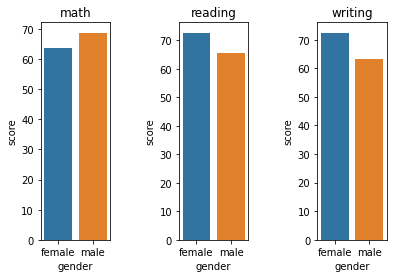

In [9]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=1, wspace=1, left = 0.2, right = 1)
for i in range(3):
    plt.subplot(1,3, i+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[i]].describe()
    sns.barplot(x = gender_df.index,y = gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[i])
plt.show()

<AxesSubplot:>

<AxesSubplot:xlabel='ethnicity'>

Text(0.5, 0, 'Group')

Text(0, 0.5, 'Mean score')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group A'),
  Text(1, 0, 'group B'),
  Text(2, 0, 'group C'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

Text(0.5, 1.0, 'math')

<AxesSubplot:>

<AxesSubplot:xlabel='ethnicity'>

Text(0.5, 0, 'Group')

Text(0, 0.5, 'Mean score')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group A'),
  Text(1, 0, 'group B'),
  Text(2, 0, 'group C'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

Text(0.5, 1.0, 'reading')

<AxesSubplot:>

<AxesSubplot:xlabel='ethnicity'>

Text(0.5, 0, 'Group')

Text(0, 0.5, 'Mean score')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group A'),
  Text(1, 0, 'group B'),
  Text(2, 0, 'group C'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

Text(0.5, 1.0, 'writing')

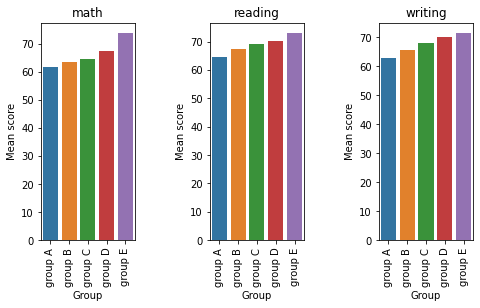

In [11]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.2)
for i in range(3):
    plt.subplot(1,3, i+1)
    ethn_df = df.groupby("ethnicity")[list(df.columns[-3:])[i]].mean()
    sns.barplot(x = ethn_df.index, y = ethn_df.values)
    plt.xlabel("Group")
    plt.ylabel("Mean score")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[i])
plt.show()

<AxesSubplot:xlabel='preparation', ylabel='math'>

Text(0.0, 1.0, 'math vs preparation test')

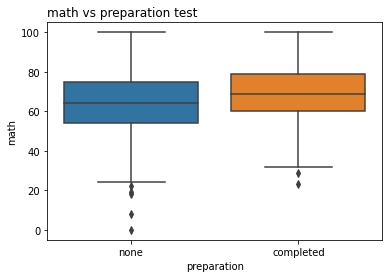

<AxesSubplot:xlabel='preparation', ylabel='reading'>

Text(0.0, 1.0, 'reading vs preparation test')

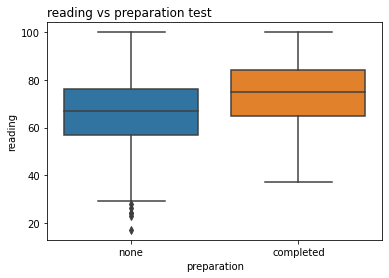

<AxesSubplot:xlabel='preparation', ylabel='writing'>

Text(0.0, 1.0, 'writing vs preparation test')

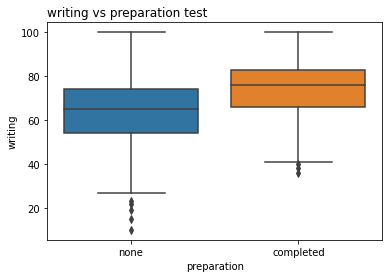

In [12]:
for i in df.columns[-3:]:
    sns.boxplot(x=df["preparation"], y=df[i])
    plt.title(i+" vs preparation test", loc="left")
    plt.show()

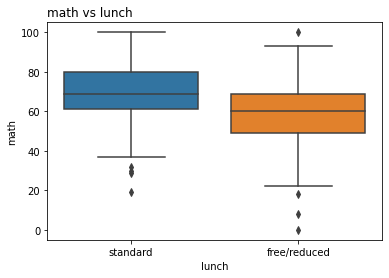

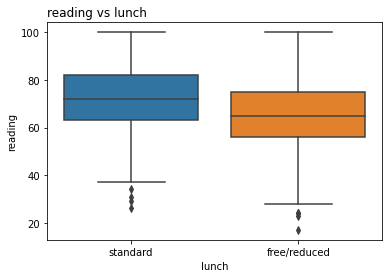

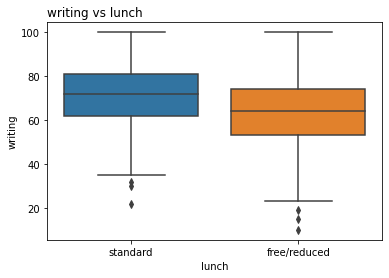

In [86]:
for i in df.columns[-3:]:
    sns.boxplot(x=df["lunch"], y=df[i])
    plt.title(i+" vs lunch", loc="left")
    plt.show()

In [87]:
labelencoder = LabelEncoder()
train_df = df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["preparation"] = labelencoder.fit_transform(train_df["preparation"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,3,1,0,88,99,95
996,male,group C,2,0,1,62,55,55
997,female,group C,2,0,0,59,71,65
998,female,group D,4,1,0,68,78,77


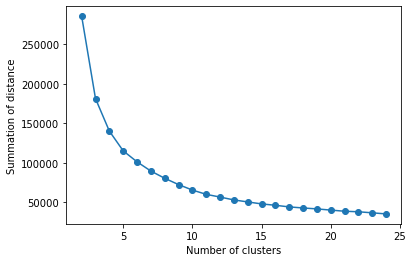

In [88]:
kmeans_dis = list()
for i in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [89]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
df["classification"] = kmeans_label
df.head(10)

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,6
4,male,group C,some college,standard,none,76,78,75,0
5,female,group B,associate's degree,standard,none,71,83,78,0
6,female,group B,some college,standard,completed,88,95,92,3
7,male,group B,some college,free/reduced,none,40,43,39,1
8,male,group D,high school,free/reduced,completed,64,64,67,5
9,female,group B,high school,free/reduced,none,38,60,50,6


In [93]:
class_df = df.groupby("classification")[df.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,68.310559,77.900621,77.527950
1,32.135135,35.972973,33.594595
2,60.092857,58.057143,56.364286
3,88.944444,93.177778,93.044444
4,82.193333,82.206667,80.913333
5,57.912162,67.783784,67.952703
6,47.759124,51.437956,49.043796
7,73.291971,68.408759,66.795620


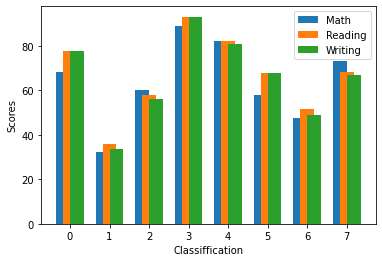

In [94]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [95]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([3, 4, 0, 7, 5, 2, 6, 1], dtype='int64', name='classification')

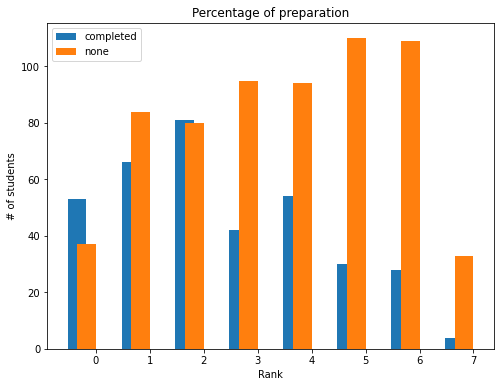

In [96]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for i in range(8):
        num = "class"+ str(i)
        num = df[df["classification"]==rank.index[i]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = df[df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("preparation") 

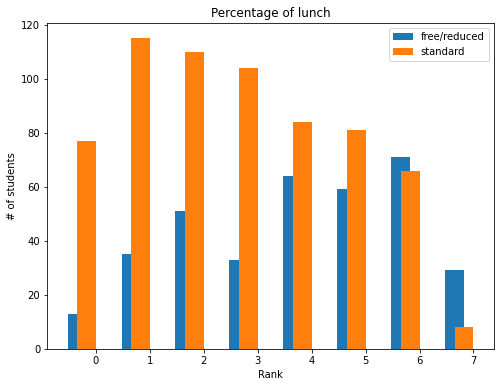

In [97]:
plot_bar_chart("lunch")

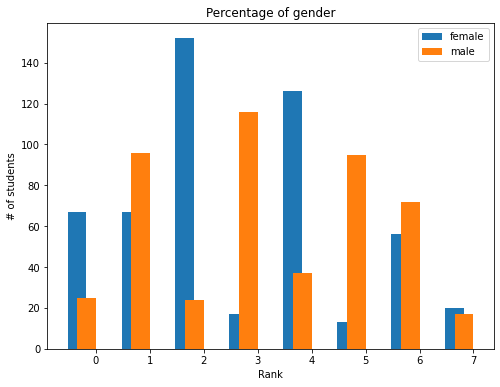

In [75]:
plot_bar_chart("gender")